# Atividade 5 - redes pré-treinadas

Nesta última parte iremos usar redes neurais pré-treinadas em duas grandes bases de dados de imagens:

1. [Imagenet](http://www.image-net.org/challenges/LSVRC/): classificação de imagens em 1000 categorias diferentes. Treinamento feito em 1 milhão de imagens.
2. [COCO](http://cocodataset.org/#home): detecção de objetos em imagens com 80 objetos identificáveis. Treinamento feito com 300 mil imagens contendo mais de 1 milhão de objetos.

Os recursos e know-how necessários para trabalhar com esses dados são bem altos. Se tornou uma tradição disponibilizar os modelos prontos para uso junto com artigos científicos e grande parte dos trabalhos focados em aplicação utilizam modelos pré-treinados. Neste roteiro iremos aprender como usá-los usando o *keras* para trabalhar *classificação de imagens* e *localização de objetos*.

**Atenção**: este roteiro é mais curto que os anteriores e o objetivo desta aula é introduzir as técnicas que serão usadas no projeto. Use seu tempo de aula para terminar os roteiros anteriores e iniciar o projeto. 


## Parte 1 - classificação de imagens 

Como visto na expositiva, o problema de classificação de imagens supõe que cada imagem está focada em somente um objeto e visa identificar este objeto em específico. Entre os vários disponíveis no keras (na seção [Applications](https://keras.io/applicatizons/)), usaremos o modelo *MobileNetV2* proposto no artigo 

    "MobileNetV2: Inverted Residuals and Linear Bottlenecks", Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov, Liang-Chieh Chen 


**Exercício**: quais são as 1000 classes do ImageNet? Sua resposta deve conter o nome da classe e seu identificador numérico. Os termos aceitos pelo seu sistema de busca devem ser iguais aos nomes das classes do *ImageNet* (para o conceito **C**, ao menos).

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

**Exercício**: A página [Applications](https://keras.io/applicatizons/) lista diversos modelos treinados no *ImageNet* para classficação de imagens. Eles estão ranqueados em uma tabela listando acurácia *top-1* e *top-5*. O que são estas medidas? 

A acurácia top-1 corresponde à taxa de acerto primeira imagem, ou seja, a primeira imagem retornada pelo algoritmo é referente ao termo buscado. O top-5 é se as primeiras 5 imagens correspondem ao termo buscado.

### Preparação dos dados

Redes pré-treinadas só aceitam imagens em formatos específicos, sendo necessário redimensionar a entrada se ela tiver um tamanho diferente. O módulo `keras_preprocessing.image` contém a função `load_img`, que permite carregar e já redimensionar imagens. 

    def load_image(image_path, target_size=(h, w))


**Exercício**: Use-a para carregar a imagem do cachorro usada na aula 16 e redimensioná-la para o tamanho $224\times 224$ (usado pelo *MobileNetV2*). Mostre a imagem carregada. 

In [0]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing import image

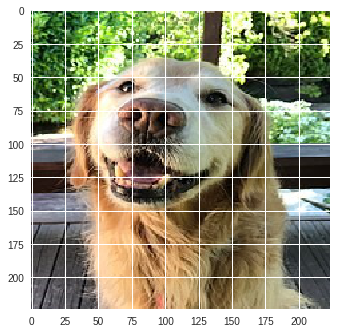

In [3]:
image_path = "/content/cachorro.jpg"
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img, cmap="gray")
plt.show()

Muitas redes neurais fazem pré-processamentos nas imagens para facilitar a tarefa de classificação. A função abaixo já faz este pré-processamento para o *MobileNetV2*. Você deverá usá-la sempre que passar uma imagem para a rede.

In [0]:
from keras.applications.mobilenet import preprocess_input, decode_predictions, MobileNet
import numpy as np

def mnetv2_input_from_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return preprocess_input(x)

## Aplicando o *MobileNetV2*

**Exercício**: consulte a [documentação](https://keras.io/applications/) e use um modelo *MobileNetV2* pré-treinado para classificar o cachorro da aula 16. Interprete a saída do seu programa.

**Dica**: procure pelo método `decode_predictions` para uma saída amigável para humanos.

In [5]:
image = mnetv2_input_from_image(img)
model = MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
preds = model.predict(image)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n02099601', 'golden_retriever', 0.8748085), ('n02099712', 'Labrador_retriever', 0.07932652), ('n02100877', 'Irish_setter', 0.023207314)]


**Exercício**: Uma rede neural possui um nó de saída para cada classe possível. Ou seja, neste caso a saída do método `predict` tem dimensão $1000$ e cada componente deste vetor representa uma classe. Responda:

1. o método `predict` devolve a saída do último nível da rede. Esta saída é proporcional à probabilidade das classes. Como encontrar a classe (numérica) com maior probabilidade usando esta informação? 

**Dica** veja a função `np.argmax` e use-a abaixo para esta tarefa.

In [7]:
# Podemos usar o np.argmax para adquirir o índice da maior probabilidade e verificar.
np.argmax(preds, axis=1)

array([207])

De acordo com o gist, a classe 207 é "Golden Retriever"

2. E se quiséssemos pegar as 5 classes (numéricas) mais prováveis? 

**Dica**: veja a função `np.argsort`

In [20]:
# Através da função np.argsort, que organizará a lista de maiores probabilidades através dos índices.
np.argsort(preds, axis=1)[0][-5:]

array([215, 218, 213, 208, 207])

3. [Este link](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) contém um dicionário mapeando números de classes para seus nomes. Consulte-o e escreva abaixo as 5 classes encontradas acima.

207: 'golden retriever',
208: 'Labrador retriever',
213: 'Irish setter, red setter',
218: 'Welsh springer spaniel',
215: 'Brittany spaniel',

**Atenção**: seus resultados nas questões acima devem ser iguais aos encontrados pela função `decode_predictions`.

**Exercício**: uma estratégia comum para interpretar os dados retornados é somente considerar os rótulos com ao menos uma certa probabilidade. Suponha que você deseja retornar somente os rótulos com ao menos $25%$ de confiança, qual o valor passado para o argumento `top` de `decode_predictions`?

Não consegui achar, mas implementei uma função que faz algo semelhante.

In [25]:
for i in decode_predictions(preds, top=5)[0]:
  if i[2] > 0.25:
    print('Predicted:', i)

Predicted: ('n02099601', 'golden_retriever', 0.8748085)


# Parte 2 - Detecção de objetos

Em *Detecção de objetos* analisamos imagens em que vários objetos podem estar presentes e desejamos encontrar os objetos e classificá-los. Ou seja, a saída da rede agora deverá ser uma lista de tuplas contendo a classe de cada objeto e sua localização. Veja um exemplo abaixo.

![Exemplo de objetos localizados em uma imagem](https://raw.githubusercontent.com/fizyr/keras-retinanet/master/images/coco1.png)

Assim como classificação de imagens, existem diversas redes pré-treinadas disponíveis publicamente. Use os links a seguir para implementar esta funcionalidade em seu projeto:

1. [Exemplos do módulo de redes neurais do OpenCV](https://github.com/opencv/opencv/tree/master/samples/dnn) - contém diversas implementações de detectores de objetos entre os exemplos. 
1. [Modelo YOLO (You Only Look Once) em Keras](https://github.com/qqwweee/keras-yolo3) - uma implementação de um modelo bem rápido para detecção de objetos
1. [Redes treinadas na biblioteca GluonCV](https://gluon-cv.mxnet.io/build/examples_detection/index.html) - essa biblioteca disponibiliza uma API de uso fácil para classificação de imagens e detecção de objetos. 

Este item não possui entrega na atividade e deve ser usado apenas como guia para a implementação do projeto!